In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
csv_file = 'data/20240122/45d2cms3cm.csv'
df = pd.read_csv(csv_file)

# 将第一列设置为时间索引

print(df.columns)
# 绘制图表
plt.plot(df[' pitch'])
plt.plot(df[' roll'])
plt.plot(df[' yaw'])
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Attitude')
plt.show()

Index(['timeTick', ' stateX', ' stateY', ' stateZ', ' stateVX', ' stateVY',
       ' stateVZ', ' whisker1', ' whisker2', ' whisker3', ' motor1', ' motor2',
       ' motor3', ' motor4', ' otX', ' otY', ' otZ', ' yaw', ' laserFront'],
      dtype='object')


KeyError: ' pitch'

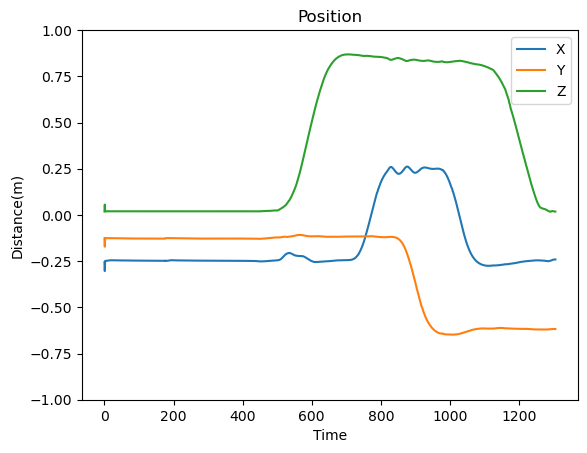

In [ ]:
plt.plot(df[' stateX'],label='X')
plt.plot(df[' stateY'],label='Y')
plt.plot(df[' stateZ'],label='Z')
plt.legend()
plt.ylim(-1,1)
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.ylim(-1,1)
plt.title('Position')
plt.show()

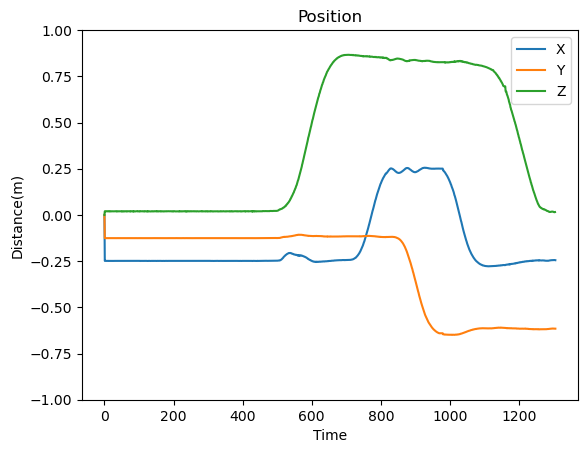

In [108]:
plt.plot(df[' otX'],label='X')
plt.plot(df[' otY'],label='Y')
plt.plot(df[' otZ'],label='Z')
plt.legend()
plt.ylim(-1,1)
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.title('Position')
plt.show()

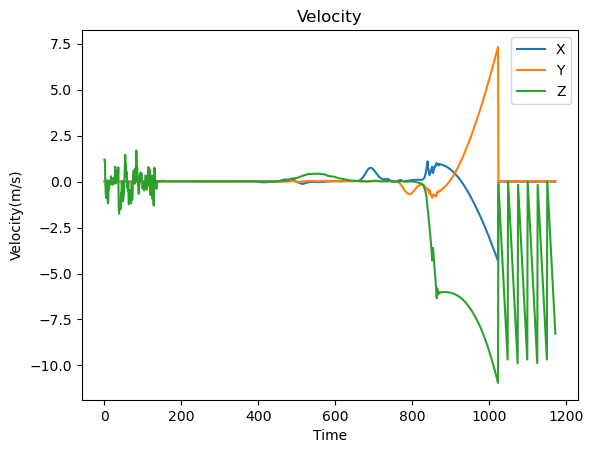

In [ ]:
plt.plot(df[' stateVX'],label='X')
plt.plot(df[' stateVY'],label='Y')
plt.plot(df[' stateVZ'],label='Z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Velocity(m/s)')
plt.ylim(0,5)
plt.title('Velocity')
plt.show()

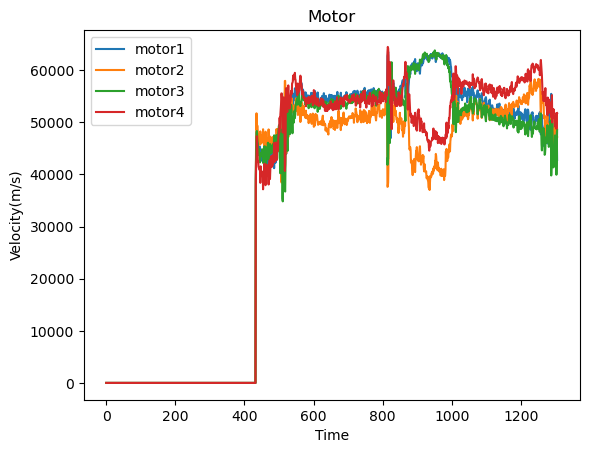

In [ ]:
plt.plot(df[' motor1'],label='motor1')
plt.plot(df[' motor2'],label='motor2')
plt.plot(df[' motor3'],label='motor3')
plt.plot(df[' motor4'],label='motor4')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Velocity(m/s)')
plt.title('Motor')
plt.show()

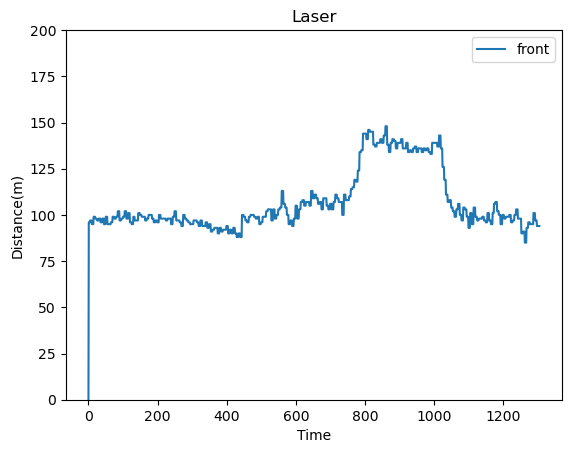

In [ ]:

# 绘制图表
plt.plot(df[' laserFront'],label='front')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.ylim(0, 200)
plt.title('Laser')
plt.show()

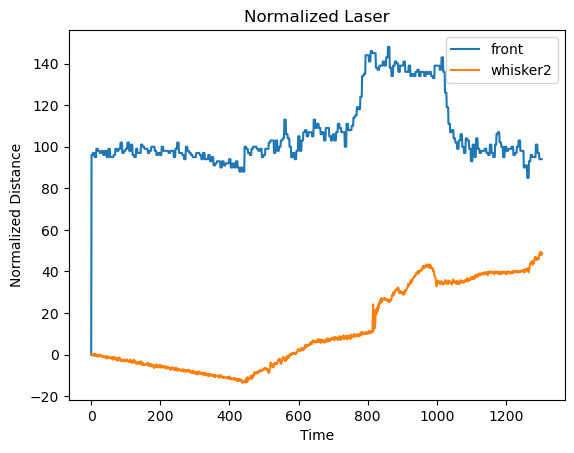

In [ ]:
scaled_whisker2 = df[' whisker2'][1:] * (df[' laserFront'][1:].max() - df[' laserFront'][1:].min()) / (df[' whisker2'][1:].max() - df[' whisker2'][1:].min())

# 绘制归一化后的数据
plt.plot(df[' laserFront'],label='front')
plt.plot((scaled_whisker2)-(scaled_whisker2[1]), label='whisker2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Normalized Distance')
plt.titl20240122e('Normalized Laser')
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def apply_lowpass_filter(data, high_freq, fs):
    filtered_data = np.zeros_like(data)
    for i in range(data.shape[1]):
        b, a = signal.butter(1, high_freq / (0.5 * fs), 'lowpass')
        zi = signal.lfilter_zi(b, a)
        filtered_data[:, i], _ = signal.lfilter(b, a, data[:, i], zi=zi*data[0, i])
    return filtered_data

def apply_highpass_filter(data, high_freq, fs):
    filtered_data = np.zeros_like(data)
    for i in range(data.shape[1]):
        b, a = signal.butter(1, high_freq / (0.5 * fs), 'highpass')
        zi = signal.lfilter_zi(b, a)
        filtered_data[:, i], _ = signal.lfilter(b, a, data[:, i], zi=zi*data[0, i])
    return filtered_data


def apply_bandpass_filter(number,data,low_freq,high_freq,fs):
    zi = signal.lfilter_zi(b, a)
    filtered_data = np.zeros_like(data)
    if len(data.shape) != 2:
        b, a = signal.butter(number, [low_freq,high_freq],fs=fs, btype='band')
        filtered_data = signal.filtfilt(b, a, data)
    else:

        for i in range(data.shape[1]):
            b, a = signal.butter(number, [low_freq,high_freq], fs=fs, btype='band')
            filtered_data[:, i],zi = signal.filtfilt(b, a, [data[:, i]],zi=zi)
    return filtered_data

def rescale_array(array1,array2):
    scaled_array=np.zeros_like(array1)
    for i in range(array1.shape[1]):
        new_min=np.min(array1[:,i])
        new_max=np.max(array1[:,i])
        min_val = np.min(array2[:,i])
        max_val = np.max(array2[:,i])
        scaled_array[:,i] = (array2[:,i] - min_val) * (new_max - new_min) / (max_val - min_val) + new_min
    return scaled_array

def rescale_array1(array1,array2):
    scaled_array=np.zeros_like(array1)
    new_min=np.min(array1)
    new_max=np.max(array1)
    min_val = np.min(array2)
    max_val = np.max(array2)
    scaled_array = (array2 - min_val) * (new_max - new_min) / (max_val - min_val) + new_min
    return scaled_array

[[157974.984375  128532.5       158089.4375   ]
 [157976.921875  128531.8359375 158091.375    ]
 [157976.921875  128539.3125    158087.5      ]
 ...
 [157924.625     128867.        158033.15625  ]
 [157924.625     128872.4765625 158031.203125 ]
 [157922.6875    128873.140625  158029.265625 ]]
[[-2.32830644e-10 -1.89174898e-10 -2.32830644e-10]
 [ 1.92300064e+00 -6.59092962e-01  1.92300064e+00]
 [ 1.89421894e+00  6.77138308e+00 -1.95178235e+00]
 ...
 [-5.91904715e+00  1.08659800e+01 -3.93593309e+00]
 [-5.83045630e+00  1.61389265e+01 -5.81553238e+00]
 [-7.66619204e+00  1.65564668e+01 -7.65149149e+00]]


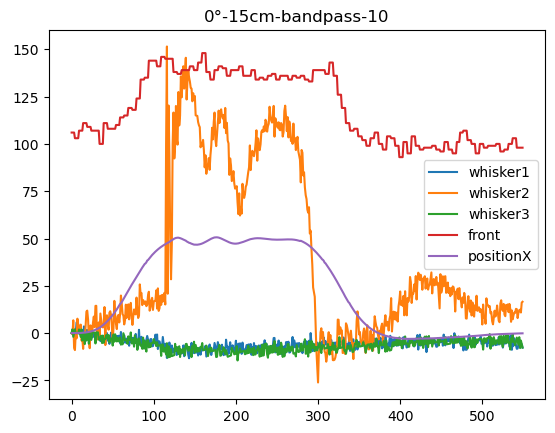

In [115]:
data = pd.read_csv('data/20240122/45d2cms3cm.csv')
pressure=data.iloc[700:1250,7:10].values
laser=data.iloc[700:1250,18].values
position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values

filtedData=apply_lowpass_filter(pressure, 10,50)
filtedData=apply_highpass_filter(pressure, 0.12,50)
print(pressure)
print(filtedData)
plt.plot(filtedData[:,0],label="whisker1")
plt.plot(filtedData[:,1],label="whisker2")
plt.plot(filtedData[:,2],label="whisker3")
plt.plot(laser,label='front')
plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
# plt.ylim(126000, 130000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

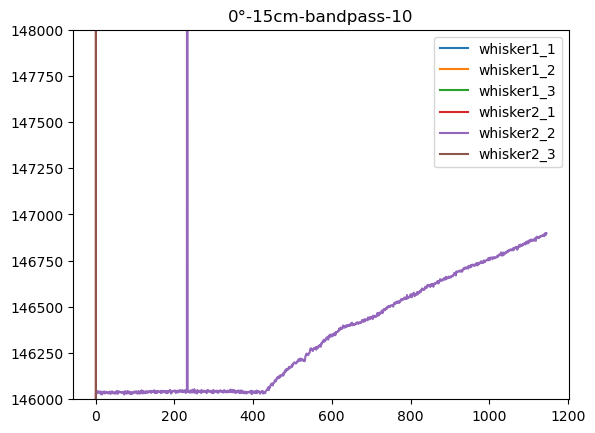

In [20]:
data = pd.read_csv('data/20240205/2024-02-05+14:57:01+optitrackstate.csv')
pressure=data.iloc[:,:].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,1],label="whisker1_1")
plt.plot(pressure[:,2],label="whisker1_2")
plt.plot(pressure[:,3],label="whisker1_3")
plt.plot(pressure[:,4],label="whisker2_1")
plt.plot(pressure[:,5],label="whisker2_2")
plt.plot(pressure[:,6],label="whisker2_3")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(146000, 148000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

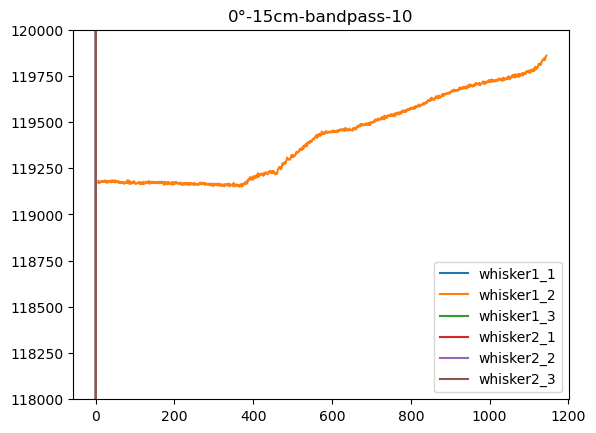

In [36]:
data = pd.read_csv('data/20240205/freeflying.csv')
pressure=data.iloc[:,6:13].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,1],label="whisker1_1")
plt.plot(pressure[:,2],label="whisker1_2")
plt.plot(pressure[:,3],label="whisker1_3")
plt.plot(pressure[:,4],label="whisker2_1")
plt.plot(pressure[:,5],label="whisker2_2")
plt.plot(pressure[:,6],label="whisker2_3")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(118000, 120000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

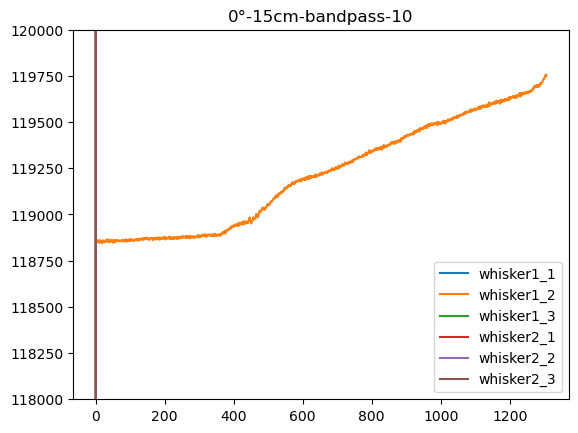

In [37]:
data = pd.read_csv('data/20240205/freeflying2.csv')
pressure=data.iloc[:,6:13].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,1],label="whisker1_1")
plt.plot(pressure[:,2],label="whisker1_2")
plt.plot(pressure[:,3],label="whisker1_3")
plt.plot(pressure[:,4],label="whisker2_1")
plt.plot(pressure[:,5],label="whisker2_2")
plt.plot(pressure[:,6],label="whisker2_3")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(118000, 120000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

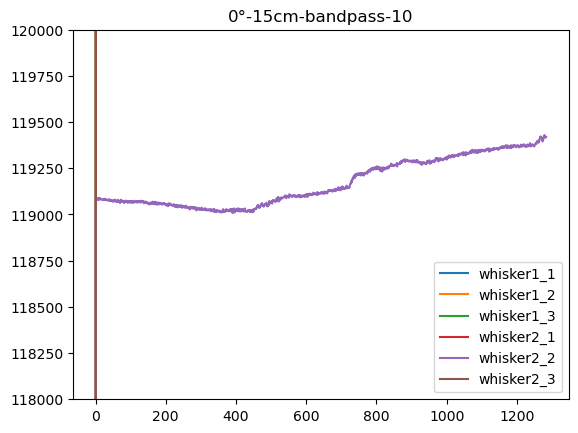

In [29]:
data = pd.read_csv('data/20240206/2024-02-06+18:40:55+optitrackstate.csv')
pressure=data.iloc[:,6:13].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,1],label="whisker1_1")
plt.plot(pressure[:,2],label="whisker1_2")
plt.plot(pressure[:,3],label="whisker1_3")
plt.plot(pressure[:,4],label="whisker2_1")
plt.plot(pressure[:,5],label="whisker2_2")
plt.plot(pressure[:,6],label="whisker2_3")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(118000, 120000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

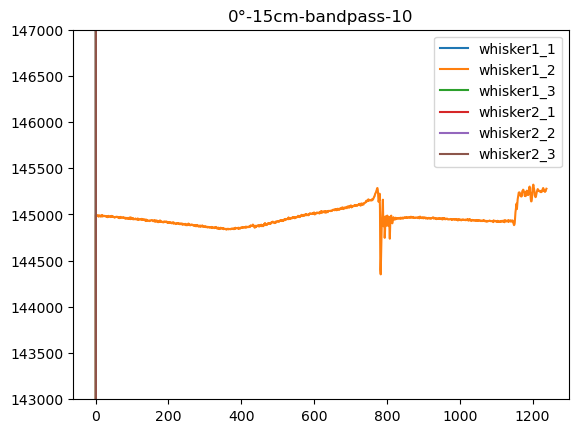

In [38]:
data = pd.read_csv('data/20240206/2024-02-06+18:45:39+optitrackstate.csv')
pressure=data.iloc[:,6:13].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,1],label="whisker1_1")
plt.plot(pressure[:,2],label="whisker1_2")
plt.plot(pressure[:,3],label="whisker1_3")
plt.plot(pressure[:,4],label="whisker2_1")
plt.plot(pressure[:,5],label="whisker2_2")
plt.plot(pressure[:,6],label="whisker2_3")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(143000, 147000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

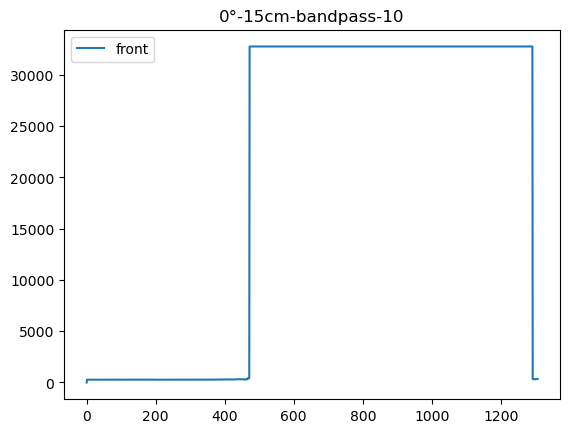

In [39]:
data = pd.read_csv('data/20240205/freeflying2.csv')
pressure=data.iloc[:,-1].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:],label="front")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
# plt.ylim(118000, 120000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

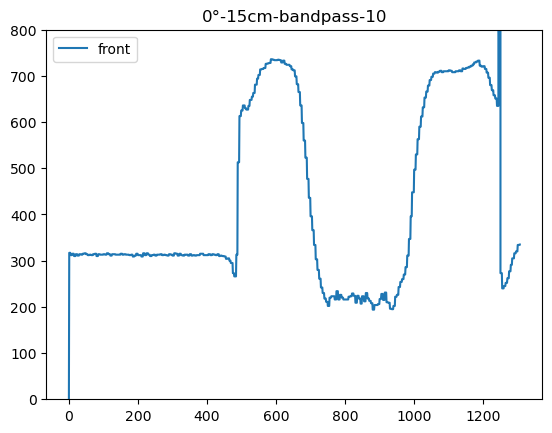

In [44]:
data = pd.read_csv('data/20240205/hit1.csv')
pressure=data.iloc[:,-1].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:],label="front")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(0, 800)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

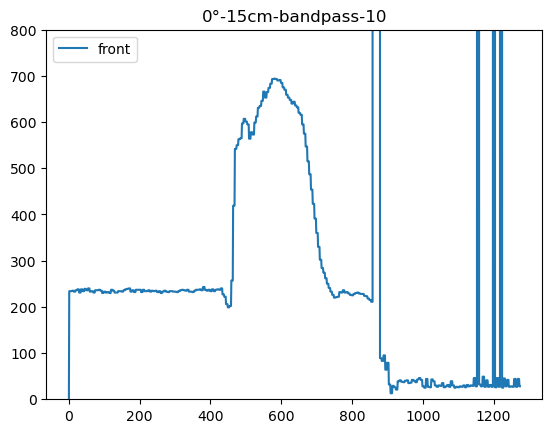

In [10]:
data = pd.read_csv('data/20240206/2024-02-06+18:24:36+optitrackstate.csv')
pressure=data.iloc[:,-1].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:],label="front")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(0, 800)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

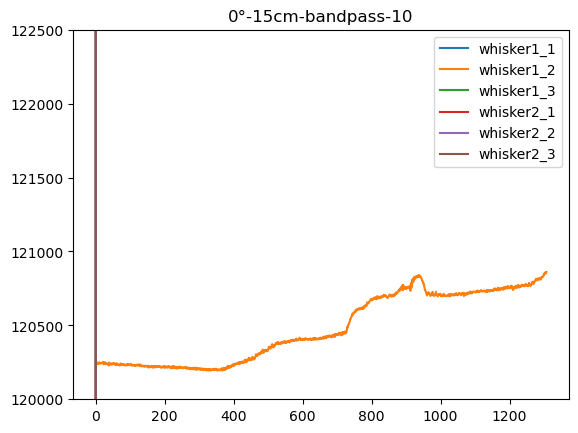

In [49]:
data = pd.read_csv('data/20240205/hit1.csv')
pressure=data.iloc[:,6:13].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,1],label="whisker1_1")
plt.plot(pressure[:,2],label="whisker1_2")
plt.plot(pressure[:,3],label="whisker1_3")
plt.plot(pressure[:,4],label="whisker2_1")
plt.plot(pressure[:,5],label="whisker2_2")
plt.plot(pressure[:,6],label="whisker2_3")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
# plt.ylim(120000, 122500)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

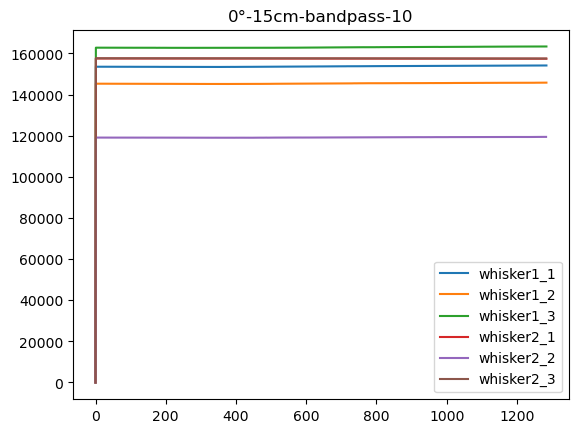

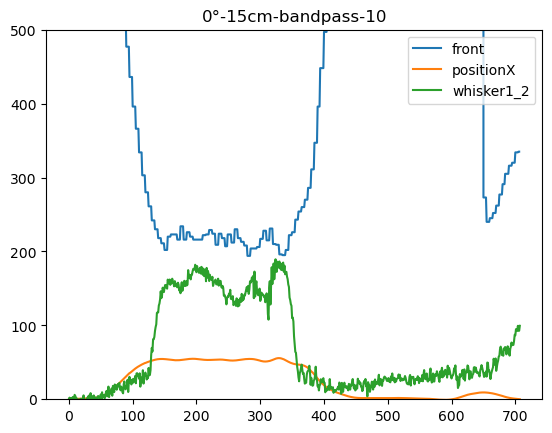

In [51]:
data = pd.read_csv('data/20240205/hit1.csv')
pressure=data.iloc[600:,6:13].values
laser=data.iloc[600:,-1].values
position=data.iloc[600:,1:4].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
# plt.plot(pressure[:,1],label="whisker1_1")
# plt.plot(pressure[:,2],label="whisker1_2")
# plt.plot(pressure[:,3],label="whisker1_3")
# plt.plot(pressure[:,4],label="whisker2_1")
# plt.plot(pressure[:,5],label="whisker2_2")
# plt.plot(pressure[:,6],label="whisker2_3")
filtedData=apply_lowpass_filter(pressure, 10,50)
filtedData=apply_highpass_filter(pressure, 0.06,50)
plt.plot(laser,label='front')
plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,1],label="whisker1_1")
plt.plot(filtedData[:,2],label="whisker1_2")
# plt.plot(filtedData[:,3],label="whisker1_3")
# plt.plot(filtedData[:,4],label="whisker2_1")
# plt.plot(filtedData[:,5],label="whisker2_2")
# plt.plot(filtedData[:,6],label="whisker2_3")

# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(0, 500)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

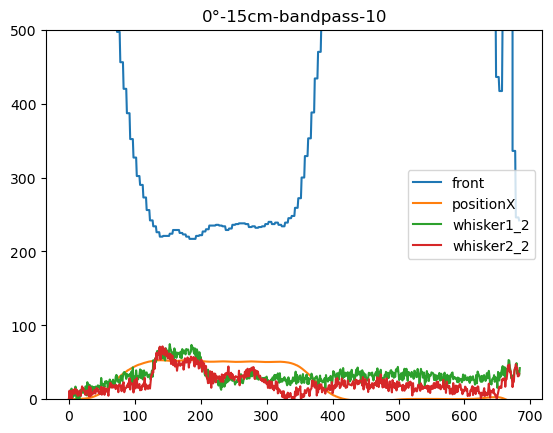

In [55]:
data = pd.read_csv('data/20240206/2024-02-06+18:40:55+optitrackstate.csv')
pressure=data.iloc[600:,6:13].values
laser=data.iloc[600:,-1].values
position=data.iloc[600:,1:4].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
# plt.plot(pressure[:,1],label="whisker1_1")
# plt.plot(pressure[:,2],label="whisker1_2")
# plt.plot(pressure[:,3],label="whisker1_3")
# plt.plot(pressure[:,4],label="whisker2_1")
# plt.plot(pressure[:,5],label="whisker2_2")
# plt.plot(pressure[:,6],label="whisker2_3")
filtedData=apply_lowpass_filter(pressure, 10,50)
filtedData=apply_highpass_filter(pressure, 0.15,50)
plt.plot(laser,label='front')
plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,1],label="whisker1_1")
plt.plot(filtedData[:,2],label="whisker1_2")
# plt.plot(filtedData[:,3],label="whisker1_3")
# plt.plot(filtedData[:,4],label="whisker2_1")
plt.plot(filtedData[:,5],label="whisker2_2")
# plt.plot(filtedData[:,6],label="whisker2_3")

# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(0, 500)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

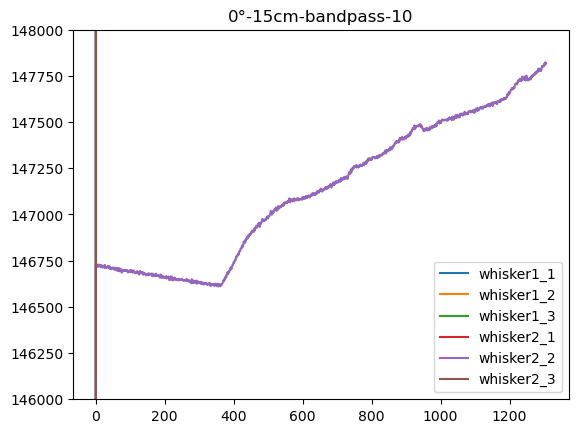

In [52]:
data = pd.read_csv('data/20240205/hit1.csv')
pressure=data.iloc[:,6:13].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,1],label="whisker1_1")
plt.plot(pressure[:,2],label="whisker1_2")
plt.plot(pressure[:,3],label="whisker1_3")
plt.plot(pressure[:,4],label="whisker2_1")
plt.plot(pressure[:,5],label="whisker2_2")
plt.plot(pressure[:,6],label="whisker2_3")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(146000, 148000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

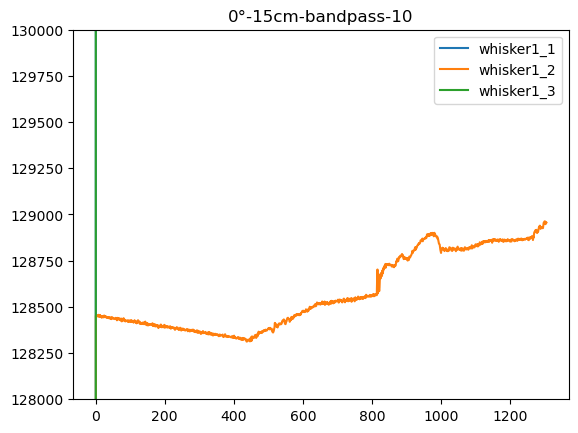

In [15]:
data = pd.read_csv('data/20240122/45d2cms3cm.csv')
pressure=data.iloc[:,7:10].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,0],label="whisker1_1")
plt.plot(pressure[:,1],label="whisker1_2")
plt.plot(pressure[:,2],label="whisker1_3")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(128000, 130000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

Camera
Optitrack raw or kalman output
Laser range
Wall